<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/230310_Electricity_Price_Prediction_with_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This project was taken from the following link

https://thecleverprogrammer.com/2021/11/15/electricity-price-prediction-with-machine-learning/

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/electricity.csv")
data.head()

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (9,10,11,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01/11/2011 00:00,None,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.00,9.30,600.71,356.00,3159.60,54.32
1,01/11/2011 00:30,None,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.00,11.10,605.42,317.00,2973.01,54.23
2,01/11/2011 01:00,None,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.00,11.10,589.97,311.00,2834.00,54.23
3,01/11/2011 01:30,None,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.00,9.30,585.94,313.00,2725.99,53.47
4,01/11/2011 02:00,None,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.00,11.10,571.52,346.00,2655.64,39.87


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DateTime                38014 non-null  object
 1   Holiday                 38014 non-null  object
 2   HolidayFlag             38014 non-null  int64 
 3   DayOfWeek               38014 non-null  int64 
 4   WeekOfYear              38014 non-null  int64 
 5   Day                     38014 non-null  int64 
 6   Month                   38014 non-null  int64 
 7   Year                    38014 non-null  int64 
 8   PeriodOfDay             38014 non-null  int64 
 9   ForecastWindProduction  38014 non-null  object
 10  SystemLoadEA            38014 non-null  object
 11  SMPEA                   38014 non-null  object
 12  ORKTemperature          38014 non-null  object
 13  ORKWindspeed            38014 non-null  object
 14  CO2Intensity            38014 non-null  object
 15  Ac

In [5]:
data.isnull().sum()

DateTime                  0
Holiday                   0
HolidayFlag               0
DayOfWeek                 0
WeekOfYear                0
Day                       0
Month                     0
Year                      0
PeriodOfDay               0
ForecastWindProduction    0
SystemLoadEA              0
SMPEA                     0
ORKTemperature            0
ORKWindspeed              0
CO2Intensity              0
ActualWindProduction      0
SystemLoadEP2             0
SMPEP2                    0
dtype: int64

In [6]:
data.columns

Index(['DateTime', 'Holiday', 'HolidayFlag', 'DayOfWeek', 'WeekOfYear', 'Day',
       'Month', 'Year', 'PeriodOfDay', 'ForecastWindProduction',
       'SystemLoadEA', 'SMPEA', 'ORKTemperature', 'ORKWindspeed',
       'CO2Intensity', 'ActualWindProduction', 'SystemLoadEP2', 'SMPEP2'],
      dtype='object')

In [7]:
cols_to_numeric = ['ForecastWindProduction','SystemLoadEA', 'SMPEA', 'ORKTemperature', 'ORKWindspeed', 'CO2Intensity', 'ActualWindProduction', 'SystemLoadEP2', 'SMPEP2']

In [8]:
for col in cols_to_numeric:
  data[col] = pd.to_numeric(data[col], errors='coerce')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DateTime                38014 non-null  object 
 1   Holiday                 38014 non-null  object 
 2   HolidayFlag             38014 non-null  int64  
 3   DayOfWeek               38014 non-null  int64  
 4   WeekOfYear              38014 non-null  int64  
 5   Day                     38014 non-null  int64  
 6   Month                   38014 non-null  int64  
 7   Year                    38014 non-null  int64  
 8   PeriodOfDay             38014 non-null  int64  
 9   ForecastWindProduction  38009 non-null  float64
 10  SystemLoadEA            38012 non-null  float64
 11  SMPEA                   38012 non-null  float64
 12  ORKTemperature          37719 non-null  float64
 13  ORKWindspeed            37715 non-null  float64
 14  CO2Intensity            38007 non-null

In [10]:
data.isnull().sum()

DateTime                    0
Holiday                     0
HolidayFlag                 0
DayOfWeek                   0
WeekOfYear                  0
Day                         0
Month                       0
Year                        0
PeriodOfDay                 0
ForecastWindProduction      5
SystemLoadEA                2
SMPEA                       2
ORKTemperature            295
ORKWindspeed              299
CO2Intensity                7
ActualWindProduction        5
SystemLoadEP2               2
SMPEP2                      2
dtype: int64

In [11]:
data = data.dropna()

In [12]:
corr = data.corr(method='pearson')

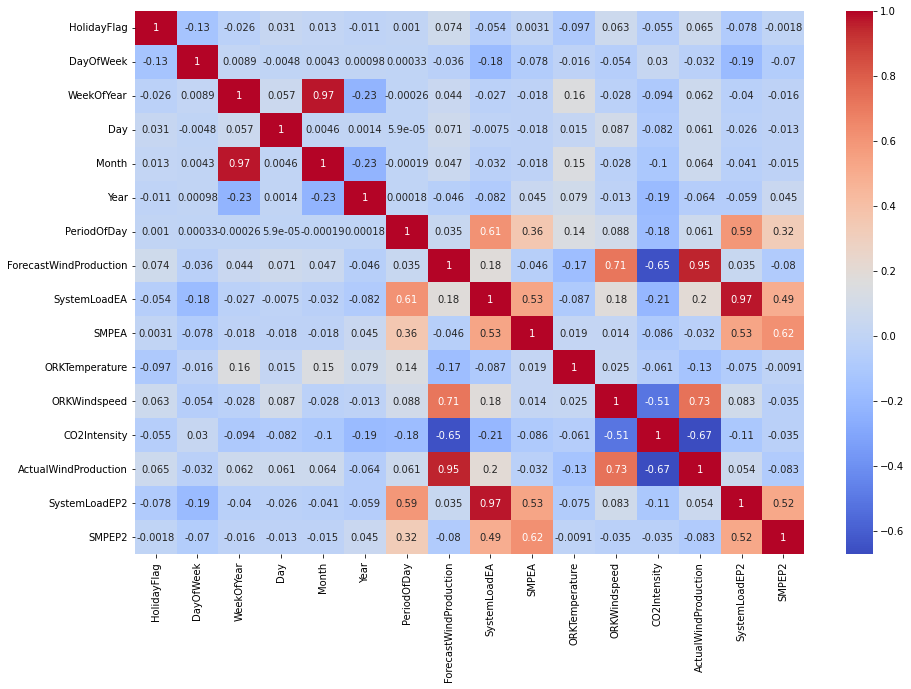

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

In [14]:
x = data[["Day", "Month", "ForecastWindProduction", "SystemLoadEA", 
          "SMPEA", "ORKTemperature", "ORKWindspeed", "CO2Intensity", 
          "ActualWindProduction", "SystemLoadEP2"]]
y = data["SMPEP2"]

In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

In [16]:
model = RandomForestRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.5796874230492255

In [17]:
features = np.array([[10, 12, 54.10, 4241.05, 49.56, 9.0, 14.8, 491.32, 54.0, 4426.84]])
model.predict(features)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([68.9368])